(112, 92)
(400, 10304)


Text(0.5, 0.98, 'Figure 1: There are 40 distinct people in the dataset, 10 images for each people.')

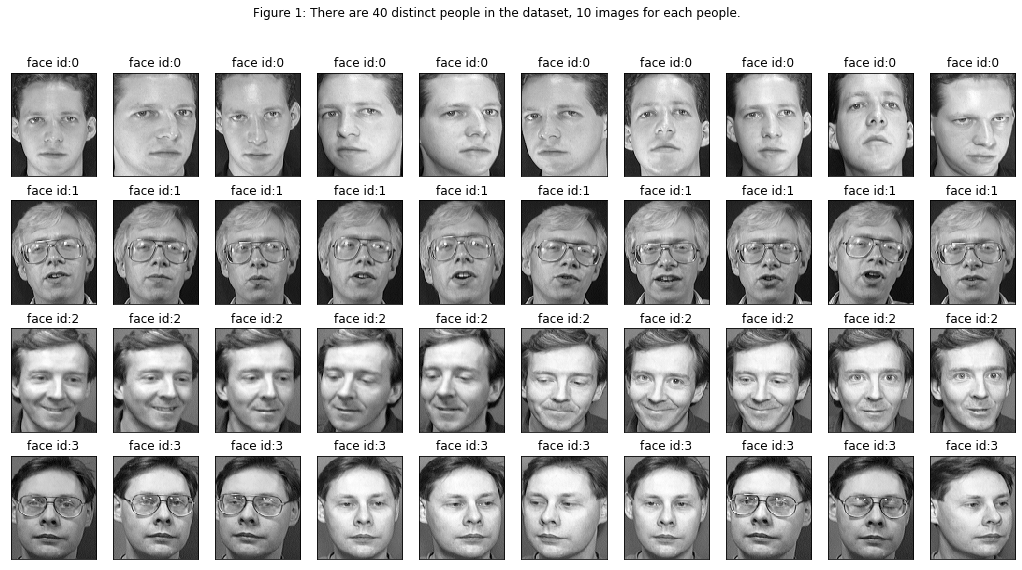

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

groups = 40 # There are 40 unique targets in the dataset
pgms = 10 # For each group, there are 10 pgms 

fullpath = "dataset/s1/1.pgm"
img = Image.open(fullpath).convert('L')
imagearray = np.array(img) 
original_shape = imagearray.shape
print(original_shape)
flat = imagearray.ravel() 
facevector = np.matrix(flat) 
matrix_all = facevector
shape = flat.shape 

for i in range(groups):
    for j in range(pgms):
        fullpath = "dataset/s{}/{}.pgm".format(i+1, j+1)
        if i == 0 and j == 0:
            continue
        img = Image.open(fullpath).convert('L')
        imagearray = np.array(img)
        # make a 1-dimensional view of imagearray
        flat = imagearray.ravel()
        # convert it to a matrix
        facevector = np.matrix(flat) 
        matrix_all = np.r_[matrix_all,facevector] #row cat 


print(matrix_all.shape) 

subject_ids = [0, 1, 2, 3]
cols = 10
fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18,9))

for i, subject_id in enumerate(subject_ids):
    for j in range(cols):
        image_index=subject_id*cols + j
        face = np.asarray(matrix_all[image_index]).reshape(original_shape) # make a PIL image and save it to jpg
        axarr[i,j].imshow(face, cmap="gray")
        axarr[i,j].set_xticks([])
        axarr[i,j].set_yticks([])
        axarr[i,j].set_title("face id:{}".format(subject_id))
plt.suptitle("Figure 1: There are 40 distinct people in the dataset, 10 images for each people.")

(112, 92)
(40, 10304)


Text(0.5, 0.98, 'Figure 2: 40 distinct images selected as targets.')

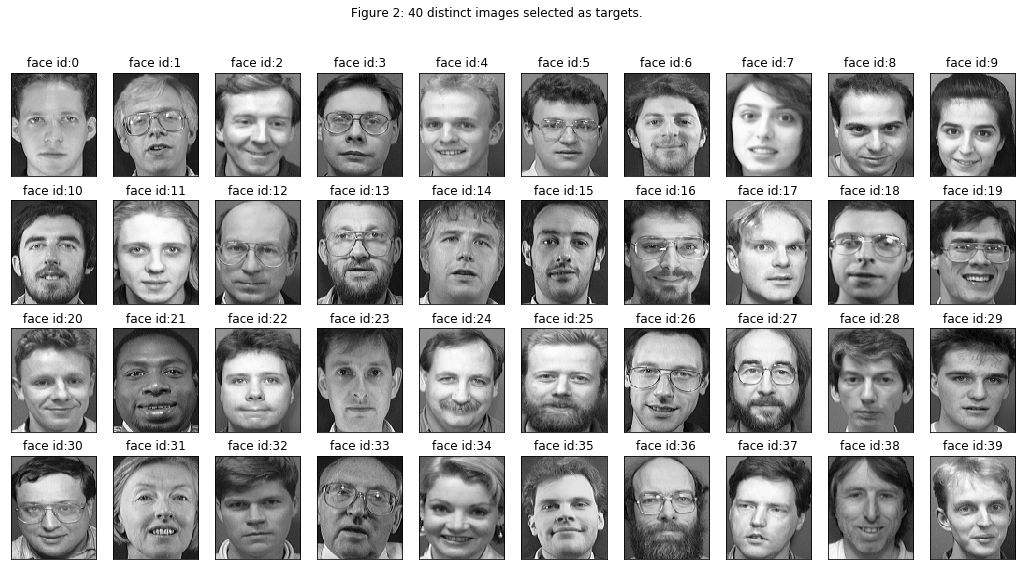

In [12]:
import numpy as np
from PIL import Image

groups = 40 # There are 40 unique targets in the dataset
pgms = 10 # For each group, there are 10 pgms 

fullpath = "dataset/s1/1.pgm"
img = Image.open(fullpath).convert('L')
imagearray = np.array(img) 
original_shape = imagearray.shape
print(original_shape)
flat = imagearray.ravel() 
facevector = np.matrix(flat) 
matrix_test = facevector
shape = flat.shape 

for i in range(groups):
    fullpath = "dataset/s{}/1.pgm".format(i+1, j+1)
    if i == 0:
        continue
    img = Image.open(fullpath).convert('L')
    imagearray = np.array(img)
    # make a 1-dimensional view of imagearray
    flat = imagearray.ravel()
    # convert it to a matrix
    facevector = np.matrix(flat) 
    matrix_test = np.r_[matrix_test,facevector] #row cat 


print(matrix_test.shape) 

#Creating 4X10 subplots in  18x9 figure size
fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
#For easy iteration flattened 4X10 subplots matrix to 40 array
axarr=axarr.flatten()
    
#iterating over user ids
for i in range(40):
    face = np.asarray(matrix_test[i]).reshape(original_shape) # make a PIL image and save it to jpg
    axarr[i].imshow(face, cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("face id:{}".format(i))
plt.suptitle("Figure 2: 40 distinct images selected as targets.")

In [13]:
import numpy as np
from PIL import Image

groups = 40 # There are 40 unique targets in the dataset
pgms = 10 # For each group, there are 10 pgms 

fullpath = "dataset/s1/2.pgm"
img = Image.open(fullpath).convert('L')
imagearray = np.array(img) 
original_shape = imagearray.shape
print(original_shape)
flat = imagearray.ravel() 
facevector = np.matrix(flat) 
matrix_train = facevector

for i in range(0, groups):
    for j in range(1, pgms):
        if i == 0 and j == 1:
            continue
        fullpath = "dataset/s{}/{}.pgm".format(i+1, j+1)
        img = Image.open(fullpath).convert('L')
        imagearray = np.array(img)
        # make a 1-dimensional view of imagearray
        flat = imagearray.ravel()
        # convert it to a matrix
        facevector = np.matrix(flat) 
        matrix_train = np.r_[matrix_train,facevector] #row cat 

print(matrix_train.shape) 

(112, 92)
(360, 10304)


In [14]:
def save_one(data):
    data = data.astype(np.uint8)
    face = np.asarray(data).reshape(original_shape) # make a PIL image and save it to jpg
    face_img = Image.fromarray(face, 'L') 
    face_img.show() 
    face_img.save("face.png")
    
# save_one(matrix_train[0])

In [15]:
train_t = np.transpose(matrix_train) 
print("The shape of face matrix:")
print(train_t.shape)
print("\n")
print("The face matrix is\n")

with np.printoptions(precision=3, suppress=True):
    print(train_t)

The shape of face matrix:
(10304, 360)


The face matrix is

[[ 60  39  63 ... 125 119 125]
 [ 60  44  53 ... 119 120 124]
 [ 62  53  35 ... 124 120 124]
 ...
 [ 32  29  41 ...  36  89  36]
 [ 34  26  10 ...  39  94  35]
 [ 34  29  24 ...  40  85  34]]


In [109]:
train_mean = np.mean(train_t, axis=1)
# save_one(train_mean)

train_normed_t = train_t - train_mean
print("The shape of normalized face matrix:")
print(train_normed_t.shape)
print("\n")
print("The normalized face matrix is\n")

with np.printoptions(precision=3, suppress=True):
    print(train_normed_t)

The shape of normalized face matrix:
(10304, 360)


The normalized face matrix is

[[-25.539 -46.539 -22.539 ...  39.461  33.461  39.461]
 [-25.444 -41.444 -32.444 ...  33.556  34.556  38.556]
 [-23.814 -32.814 -50.814 ...  38.186  34.186  38.186]
 ...
 [-45.006 -48.006 -36.006 ... -41.006  11.994 -41.006]
 [-41.994 -49.994 -65.994 ... -36.994  18.006 -40.994]
 [-41.311 -46.311 -51.311 ... -35.311   9.689 -41.311]]


In [17]:

#1) Get the reduced covariance matrix based on Turk and Pentland:
train_normed = np.transpose(train_normed_t) 
CovMatrix=np.matmul(train_normed, train_normed_t) 
print("The shape of covariance matrix:")
print(CovMatrix.shape)
print("\n")
print("The covariance matrix is\n")

with np.printoptions(precision=3, suppress=True):
    print(CovMatrix)

The shape of covariance matrix:
(360, 360)


The covariance matrix is

[[26922347.067 11184213.217 10866120.583 ...  3535314.217  4455967.603
   4154936.505]
 [11184213.217 19921075.367 10111985.733 ...  2578085.367  3427458.753
   2002185.655]
 [10866120.583 10111985.733 28750304.1   ...  1923315.733  9230743.119
   -207535.978]
 ...
 [ 3535314.217  2578085.367  1923315.733 ... 12755428.367  1759265.753
   5210719.655]
 [ 4455967.603  3427458.753  9230743.119 ...  1759265.753 13895756.139
   2672363.042]
 [ 4154936.505  2002185.655  -207535.978 ...  5210719.655  2672363.042
  13680607.944]]


In [91]:
# 2) Get eigenvalues and eigenvectors
evals,evects = np.linalg.eig(CovMatrix) 

k = 30
idx = evals.argsort()[::-1][:k] 
eigenValues = evals[idx]
eigenVectors = evects[:,idx]

print("The 30 highest eigenvalues and corresponding eigenvectors:")
print("\n")
print(eigenValues)
print("\n")

print("The shape of eigenvectors:")
print(eigenVectors.shape)
print("\n")
with np.printoptions(precision=3, suppress=True):
    print(eigenVectors)

The 30 highest eigenvalues and corresponding eigenvectors:


[1.01151192e+09 7.52026949e+08 3.86923842e+08 3.22857116e+08
 2.98297594e+08 1.92114936e+08 1.45231252e+08 1.37542215e+08
 1.14906359e+08 1.02284828e+08 8.22922410e+07 7.98042184e+07
 6.69069831e+07 6.08801179e+07 5.65007565e+07 5.42164025e+07
 5.07151364e+07 4.80093796e+07 4.16768529e+07 4.00208553e+07
 3.97780359e+07 3.60700666e+07 3.55785710e+07 3.20950921e+07
 3.11707840e+07 2.81638018e+07 2.75704657e+07 2.71996662e+07
 2.68114502e+07 2.57485852e+07]


The shape of eigenvectors:
(360, 30)


[[ 0.095 -0.026 -0.034 ...  0.013 -0.044 -0.047]
 [ 0.085 -0.013  0.049 ... -0.    -0.07   0.003]
 [ 0.101 -0.043 -0.025 ... -0.09   0.006 -0.009]
 ...
 [ 0.027 -0.034 -0.074 ...  0.026 -0.029  0.044]
 [ 0.044 -0.046 -0.044 ...  0.07   0.014 -0.102]
 [ 0.018 -0.016 -0.101 ... -0.006  0.007  0.052]]


In [19]:
vector = train_normed_t * eigenVectors[:,:1]
eigenfaces = vector

for i in range(k):
    if i == 0:
        continue
    vector = train_normed_t * eigenVectors[:,i:i+1]
    eigenfaces = np.c_[eigenfaces,vector]
    
print("The shape of eigenfaces:")
print(eigenfaces.shape)
print("\n")
print("The eigenfaces is\n")

with np.printoptions(precision=3, suppress=True):
    print(eigenfaces)

The shape of eigenfaces:
(10304, 30)


The eigenfaces is

[[ -58.086 -407.157 -369.339 ...  -23.316   44.075  -14.566]
 [ -59.087 -404.588 -372.175 ...  -17.618   40.734  -19.616]
 [ -60.207 -404.895 -368.994 ...  -19.466   41.356  -18.402]
 ...
 [-229.152  279.761 -300.139 ...   -8.817   30.111    1.459]
 [-203.441  260.144 -307.613 ...  -28.013   39.773   11.682]
 [-237.046  238.185 -317.637 ...  -43.58    35.75     6.393]]


Text(0.5, 0.98, 'Figure 3: The 30 top eigenfaces')

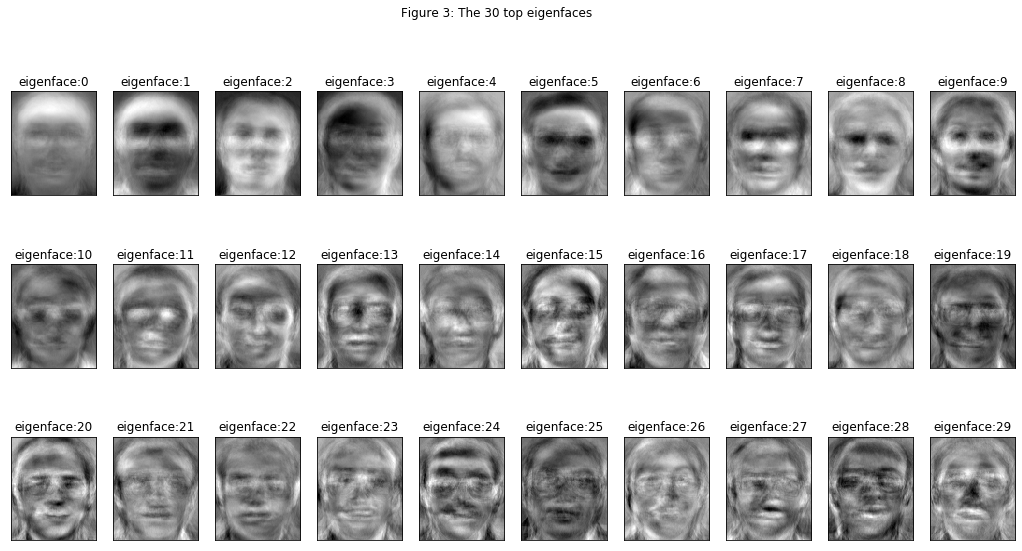

In [20]:
#Creating 3X10 subplots in  18x9 figure size
fig, axarr=plt.subplots(nrows=3, ncols=10, figsize=(18, 9))
#For easy iteration flattened 3X10 subplots matrix to 30 array
axarr=axarr.flatten()
    
#iterating over user ids
for i in range(30):
    face = np.asarray(eigenfaces[:,i]).reshape(original_shape) # make a PIL image and save it to jpg
    axarr[i].imshow(face, cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigenface:{}".format(i))
plt.suptitle("Figure 3: The 30 top eigenfaces")

Text(0.5, 0.98, 'Figure 5: Five sample pairs of test and predicted image.')

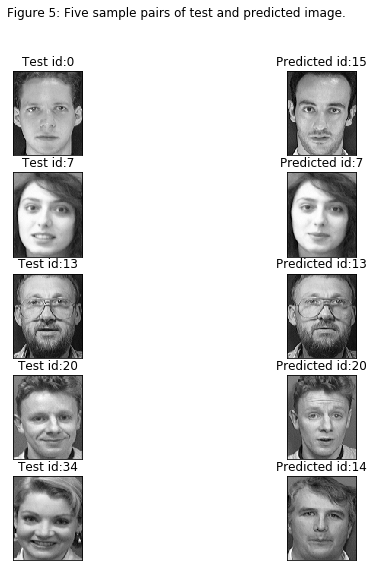

In [106]:
eigenfaces_t = np.transpose(eigenfaces)
train_projected = eigenfaces_t * train_normed_t

#Creating 4X10 subplots in  18x9 figure size
fig, axarr=plt.subplots(nrows=5, ncols=2, figsize=(9, 9))
    
subject_ids = [0, 7,13,  20, 34]
cols = 2
    
for i, subject_id in enumerate(subject_ids):
    for j in range(cols):
        face = np.asarray(matrix_test[subject_id]).reshape(original_shape) # make a PIL image and save it to jpg
        if j == 0:
            axarr[i,j].set_title("Test id:{}".format(subject_id))
        elif j == 1:
            test_t = np.transpose(matrix_test[subject_id])
            test_normed_t = (test_t - train_mean)
            test_projected = eigenfaces_t * test_normed_t
            distances = [] 
            for m in range(360):
                distance = np.linalg.norm(train_projected[:,m] - test_projected)
                distances.append(distance)
            idx = distances.index(min(distances))
            face = np.asarray(matrix_train[idx]).reshape(original_shape) # make a PIL image and save it to jpg
            axarr[i,j].set_title("Predicted id:{}".format(idx//9))
        axarr[i,j].imshow(face, cmap="gray")
        axarr[i,j].set_xticks([])
        axarr[i,j].set_yticks([])
        
plt.suptitle("Figure 5: Five sample pairs of test and predicted image.")

In [43]:
results = []
for i in range(40):
    test_t = np.transpose(matrix_test[i])
    test_normed_t = (test_t - train_mean)
    test_projected = eigenfaces_t * test_normed_t
    distances = [] 
    for m in range(360):
        distance = np.linalg.norm(train_projected[:,m] - test_projected)
        distances.append(distance)
    idx = distances.index(min(distances))
    results.append((i, idx//9))

In [90]:
cnt = 0
print("Wrong Matches out of 40 (Test id => Predicted id): ")
for i in range(len(results)):
    if results[i][0] == results[i][1]:
        cnt = cnt + 1
    else:
        text = "{} => {}".format(results[i][0], results[i][1])
        print(text)
        
print("\nAccuracy is {}%.".format(int(cnt * 100/ 40)))

Wrong Matches out of 40 (Test id => Predicted id): 
0 => 15
34 => 14

Accuracy is 95%.
